In [1]:
# Imports

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import nltk
from nltk import punkt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

import webbrowser

import difflib

# NLP

In [2]:
with open('./Pickles/df_sneakers.pickle', 'rb') as f:
    df_sneakers = pickle.load(f)

In [3]:
df_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,[The Pharrell Williams x Adidas Human Race NMD...,8,[The Pharrell Williams x Adidas Human Race NMD...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,[Some of the sneakers’ diehard fans remarked t...,11,"[The main model in the Stan Smith collection, ..."
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,"[The Adidas Continental 80 has a narrow fit, s...",10,[The majority of testers admire the Adidas Con...
3,Adidas POD-S3.1,92,The Adidas POD-S3.1 is a new model added to th...,2,[One person thought that the stitching and glu...,9,[Almost all the buyers of the Adidas POD-S3.1 ...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,[Loyal Superstars wearers are disappointed tha...,9,[The majority of the reviewers like that the A...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,"[This sneaker is quite narrow, according to a ...",8,[Most of the reviewers are attracted to the Ad...
6,Adidas I-5923,91,"Initially introduced as the Iniki Runner, the ...",5,"[Several, including those with wide feet, note...",9,[Many like that the Adidas I-5923 sneakers com...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,[The upper is denser than Primeknit and isn’t ...,11,[Many hailed the design of the Adidas Sobakov ...
8,Adidas Swift Run,93,"Another low-top shoe from Adidas, the Swift Ru...",3,[Several of the users complain about the shoe ...,10,[Most of the comments state that the Adidas Sw...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD_R1 Primeknit is priced ...,2,"[While they are happy with their purchase, qui...",9,[A lot of wearers love the upper of the Adidas...


In [4]:
nlp_sneakers = df_sneakers.copy()

In [5]:
# Converting lists into strings

nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(', '.join)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(', '.join)

In [6]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,The Pharrell Williams x Adidas Human Race NMD ...,8,The Pharrell Williams x Adidas Human Race NMD ...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,Some of the sneakers’ diehard fans remarked th...,11,"The main model in the Stan Smith collection, t..."
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,"The Adidas Continental 80 has a narrow fit, se...",10,The majority of testers admire the Adidas Cont...
3,Adidas POD-S3.1,92,The Adidas POD-S3.1 is a new model added to th...,2,One person thought that the stitching and glui...,9,Almost all the buyers of the Adidas POD-S3.1 s...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,Loyal Superstars wearers are disappointed that...,9,The majority of the reviewers like that the Ad...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,"This sneaker is quite narrow, according to a c...",8,Most of the reviewers are attracted to the Adi...
6,Adidas I-5923,91,"Initially introduced as the Iniki Runner, the ...",5,"Several, including those with wide feet, note ...",9,Many like that the Adidas I-5923 sneakers come...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,The upper is denser than Primeknit and isn’t t...,11,Many hailed the design of the Adidas Sobakov a...
8,Adidas Swift Run,93,"Another low-top shoe from Adidas, the Swift Ru...",3,Several of the users complain about the shoe h...,10,Most of the comments state that the Adidas Swi...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD_R1 Primeknit is priced ...,2,"While they are happy with their purchase, quit...",9,A lot of wearers love the upper of the Adidas ...


In [7]:
# analyzer = SentimentIntensityAnalyzer()

In [8]:
# def text_analyzer(series, sentiment=None):
#     score_list = []
#     for text in series:
#         vs = analyzer.polarity_scores(text)
#         if sentiment == 'neg':
#             score_list.append(vs['neg'])
#         elif sentiment == 'neu':
#             score_list.append(vs['neu'])
#         elif sentiment == 'pos':
#             score_list.append(vs['pos'])
#         elif sentiment == 'compound':
#             score_list.append(vs['compound'])
#         else:
#             score_list.append(vs)
#     return score_list

In [9]:
# New columns for the Vader scores

# nlp_sneakers['bottom_line_score'] = text_analyzer(nlp_sneakers['bottom_line'], sentiment='compound')
# nlp_sneakers['con_text_score'] = text_analyzer(nlp_sneakers['con_text'], sentiment='neg')
# nlp_sneakers['pro_text_score'] = text_analyzer(nlp_sneakers['pro_text'], sentiment='pos')

In [10]:
# nlp_sneakers

In [11]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [12]:
# Removing punctuations

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(remove_punctuations)
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(remove_punctuations)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(remove_punctuations)

In [13]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,The Pharrell Williams x Adidas Human Race NMD ...,8,The Pharrell Williams x Adidas Human Race NMD ...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,Some of the sneakers’ diehard fans remarked th...,11,The main model in the Stan Smith collection t...
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,The Adidas Continental 80 has a narrow fit se...,10,The majority of testers admire the Adidas Cont...
3,Adidas POD-S3.1,92,The Adidas POD S3 1 is a new model added to th...,2,One person thought that the stitching and glui...,9,Almost all the buyers of the Adidas POD S3 1 s...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,Loyal Superstars wearers are disappointed that...,9,The majority of the reviewers like that the Ad...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,This sneaker is quite narrow according to a c...,8,Most of the reviewers are attracted to the Adi...
6,Adidas I-5923,91,Initially introduced as the Iniki Runner the ...,5,Several including those with wide feet note ...,9,Many like that the Adidas I 5923 sneakers come...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,The upper is denser than Primeknit and isn’t t...,11,Many hailed the design of the Adidas Sobakov a...
8,Adidas Swift Run,93,Another low top shoe from Adidas the Swift Ru...,3,Several of the users complain about the shoe h...,10,Most of the comments state that the Adidas Swi...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD R1 Primeknit is priced ...,2,While they are happy with their purchase quit...,9,A lot of wearers love the upper of the Adidas ...


In [14]:
# Lowercasing

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].str.lower()
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].str.lower()
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].str.lower()

In [15]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,adidas originals’ nmd human race shoes live up...,4,the pharrell williams x adidas human race nmd ...,8,the pharrell williams x adidas human race nmd ...
1,Adidas Stan Smith,93,after adidas brought back the stan smith about...,4,some of the sneakers’ diehard fans remarked th...,11,the main model in the stan smith collection t...
2,Adidas Continental 80,92,adidas sneakers are known for taking inspirati...,3,the adidas continental 80 has a narrow fit se...,10,the majority of testers admire the adidas cont...
3,Adidas POD-S3.1,92,the adidas pod s3 1 is a new model added to th...,2,one person thought that the stitching and glui...,9,almost all the buyers of the adidas pod s3 1 s...
4,Adidas Superstar,94,the adidas superstar is absolutely an iconic c...,3,loyal superstars wearers are disappointed that...,9,the majority of the reviewers like that the ad...
5,Adidas Grand Court,92,the three stripes tweaked its tennis classics ...,2,this sneaker is quite narrow according to a c...,8,most of the reviewers are attracted to the adi...
6,Adidas I-5923,91,initially introduced as the iniki runner the ...,5,several including those with wide feet note ...,9,many like that the adidas i 5923 sneakers come...
7,Adidas Sobakov,92,after the release of the adidas kamanda with a...,5,the upper is denser than primeknit and isn’t t...,11,many hailed the design of the adidas sobakov a...
8,Adidas Swift Run,93,another low top shoe from adidas the swift ru...,3,several of the users complain about the shoe h...,10,most of the comments state that the adidas swi...
9,Adidas NMD_R1 Primeknit,92,even if the adidas nmd r1 primeknit is priced ...,2,while they are happy with their purchase quit...,9,a lot of wearers love the upper of the adidas ...


In [16]:
# Removing numbers

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].str.replace('\d+', ' ')
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].str.replace('\d+', ' ')
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].str.replace('\d+', ' ')

In [17]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,adidas originals’ nmd human race shoes live up...,4,the pharrell williams x adidas human race nmd ...,8,the pharrell williams x adidas human race nmd ...
1,Adidas Stan Smith,93,after adidas brought back the stan smith about...,4,some of the sneakers’ diehard fans remarked th...,11,the main model in the stan smith collection t...
2,Adidas Continental 80,92,adidas sneakers are known for taking inspirati...,3,the adidas continental has a narrow fit sev...,10,the majority of testers admire the adidas cont...
3,Adidas POD-S3.1,92,the adidas pod s is a new model added to th...,2,one person thought that the stitching and glui...,9,almost all the buyers of the adidas pod s s...
4,Adidas Superstar,94,the adidas superstar is absolutely an iconic c...,3,loyal superstars wearers are disappointed that...,9,the majority of the reviewers like that the ad...
5,Adidas Grand Court,92,the three stripes tweaked its tennis classics ...,2,this sneaker is quite narrow according to a c...,8,most of the reviewers are attracted to the adi...
6,Adidas I-5923,91,initially introduced as the iniki runner the ...,5,several including those with wide feet note ...,9,many like that the adidas i sneakers come in...
7,Adidas Sobakov,92,after the release of the adidas kamanda with a...,5,the upper is denser than primeknit and isn’t t...,11,many hailed the design of the adidas sobakov a...
8,Adidas Swift Run,93,another low top shoe from adidas the swift ru...,3,several of the users complain about the shoe h...,10,most of the comments state that the adidas swi...
9,Adidas NMD_R1 Primeknit,92,even if the adidas nmd r primeknit is priced ...,2,while they are happy with their purchase quit...,9,a lot of wearers love the upper of the adidas ...


In [18]:
# Removing stop words

stop = set(stopwords.words('english'))
stop.add('adidas')
stop.add('nike')
stop.add('superstar')
stop.add('stan')
stop.add('smith')
stop.add('air')
stop.add('max')
stop.add('force')
stop.add('one')
stop.add('nmd')
stop.add('eqt')
stop.add('spzl')
stop.add('model')
stop.add('silhouette')
stop.add('sneaker')
stop.add('sneakers')
stop.add('shoe')
stop.add('shoes')
stop.add('pair')
stop.add('kick')
stop.add('reviewer')
stop.add('reviewers')
stop.add('user')
stop.add('users')
stop.add('wearer')
stop.add('wearers')
stop.add('buyer')
stop.add('buyers')
stop.add('purchaser')
stop.add('purchasers')
stop.add('number')
stop.add('numbers')
stop.add('majority')
stop.add('top')
stop.add('many')
stop.add('lot')
stop.add('several')
stop.add('couple')
stop.add('few')
stop.add('handful')
stop.add('say')
stop.add('saying')
stop.add('said')
stop.add('look')
stop.add('looking')
stop.add('run')
stop.add('running')
stop.add('ran')
stop.add('find')
stop.add('finding')
stop.add('found')
stop.add('get')
stop.add('getting')
stop.add('got')
stop.add('use')
stop.add('using')
stop.add('used')
stop.add('bite')
stop.add('bitten')
stop.add('bit')
stop.add('note')
stop.add('noted')
stop.add('noting')
stop.add('wear')
stop.add('wearing')
stop.add('wore')
stop.add('worn')
stop.add('make')
stop.add('making')
stop.add('made')
stop.add('feel')
stop.add('feeling')
stop.add('felt')
stop.add('like')
stop.add('liking')
stop.add('liked')
stop.add('complain')
stop.add('complaining')
stop.add('complained')
stop.add('mention')
stop.add('mentioning')
stop.add('mentioned')
stop.add('disappoint')
stop.add('disappointing')
stop.add('disappointed')
stop.add('disappointment')
stop.add('according')
stop.add('foot')
stop.add('feet')
stop.add('upper')
stop.add('also')
stop.add('low')
stop.add('high')
stop.add('comfort')
stop.add('well')
stop.add('fit')

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [19]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,originals’ human race live brand’s tradition q...,4,pharrell williams x human race runs big place ...,8,pharrell williams x human race looks thumbs ov...
1,Adidas Stan Smith,93,brought back years ago seen renaissance match ...,4,sneakers’ diehard fans remarked leather lower ...,11,main collection comfortable reported large aff...
2,Adidas Continental 80,92,known taking inspiration heritage styles case ...,3,continental narrow testers detected wish arch ...,10,testers admire continental ’s unique style rec...
3,Adidas POD-S3.1,92,pod new added line waves market since release ...,2,person thought stitching gluing knit onto sole...,9,almost pod would recommend others nice modern ...
4,Adidas Superstar,94,absolutely iconic classic loved fans casual co...,3,loyal superstars quality seems declined years ...,9,iconic classic never goes style greater commen...
5,Adidas Grand Court,92,three stripes tweaked tennis classics fresher ...,2,quite narrow enough support,8,attracted grand court’s simplicity heel doesn’...
6,Adidas I-5923,91,initially introduced iniki runner unknown reas...,5,including wide extensive usual shoes’ stretchy...,9,come variety fresh colorways iterations think ...
7,Adidas Sobakov,92,release kamanda deliberately misshapen midsole...,5,denser primeknit isn’t stretchy knitted covers...,11,hailed design sobakov innovative unique knitte...
8,Adidas Swift Run,93,another swift offers great injection molded ev...,3,poor quality point knit material could difficu...,10,comments state swift comfortable good lightwei...
9,Adidas NMD_R1 Primeknit,92,even r primeknit priced average rate three str...,2,happy purchase quite still think expensive lea...,9,love r primeknit hugs sock stylish updating r ...


In [20]:
# Lemmatizing

lemmatizer = WordNetLemmatizer()

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))

In [21]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,originals’ human race live brand’s tradition q...,4,pharrell williams x human race run big place a...,8,pharrell williams x human race look thumb over...
1,Adidas Stan Smith,93,bring back year ago see renaissance match hist...,4,sneakers’ diehard fan remark leather lower qua...,11,main collection comfortable report large affor...
2,Adidas Continental 80,92,know take inspiration heritage style case cont...,3,continental narrow tester detect wish arch sup...,10,tester admire continental ’s unique style reco...
3,Adidas POD-S3.1,92,pod new add line wave market since release mod...,2,person think stitch glue knit onto sole do hap...,9,almost pod would recommend others nice modern ...
4,Adidas Superstar,94,absolutely iconic classic love fan casual cons...,3,loyal superstar quality seem decline year plea...,9,iconic classic never go style greater commend ...
5,Adidas Grand Court,92,three stripe tweak tennis classic fresher clea...,2,quite narrow enough support,8,attract grand court’s simplicity heel doesn’t ...
6,Adidas I-5923,91,initially introduce iniki runner unknown reaso...,5,include wide extensive usual shoes’ stretchy f...,9,come variety fresh colorways iteration think s...
7,Adidas Sobakov,92,release kamanda deliberately misshapen midsole...,5,denser primeknit isn’t stretchy knit cover isn...,11,hail design sobakov innovative unique knit com...
8,Adidas Swift Run,93,another swift offer great injection mold eva m...,3,poor quality point knit material could difficu...,10,comment state swift comfortable good lightweig...
9,Adidas NMD_R1 Primeknit,92,even r primeknit price average rate three stri...,2,happy purchase quite still think expensive lea...,9,love r primeknit hug sock stylish update r sty...


In [22]:
# Tokenizing

tokenizer = word_tokenize

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(tokenizer)
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(tokenizer)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(tokenizer)

In [23]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,"[originals, ’, human, race, live, brand, ’, s,...",4,"[pharrell, williams, x, human, race, run, big,...",8,"[pharrell, williams, x, human, race, look, thu..."
1,Adidas Stan Smith,93,"[bring, back, year, ago, see, renaissance, mat...",4,"[sneakers, ’, diehard, fan, remark, leather, l...",11,"[main, collection, comfortable, report, large,..."
2,Adidas Continental 80,92,"[know, take, inspiration, heritage, style, cas...",3,"[continental, narrow, tester, detect, wish, ar...",10,"[tester, admire, continental, ’, s, unique, st..."
3,Adidas POD-S3.1,92,"[pod, new, add, line, wave, market, since, rel...",2,"[person, think, stitch, glue, knit, onto, sole...",9,"[almost, pod, would, recommend, others, nice, ..."
4,Adidas Superstar,94,"[absolutely, iconic, classic, love, fan, casua...",3,"[loyal, superstar, quality, seem, decline, yea...",9,"[iconic, classic, never, go, style, greater, c..."
5,Adidas Grand Court,92,"[three, stripe, tweak, tennis, classic, freshe...",2,"[quite, narrow, enough, support]",8,"[attract, grand, court, ’, s, simplicity, heel..."
6,Adidas I-5923,91,"[initially, introduce, iniki, runner, unknown,...",5,"[include, wide, extensive, usual, shoes, ’, st...",9,"[come, variety, fresh, colorways, iteration, t..."
7,Adidas Sobakov,92,"[release, kamanda, deliberately, misshapen, mi...",5,"[denser, primeknit, isn, ’, t, stretchy, knit,...",11,"[hail, design, sobakov, innovative, unique, kn..."
8,Adidas Swift Run,93,"[another, swift, offer, great, injection, mold...",3,"[poor, quality, point, knit, material, could, ...",10,"[comment, state, swift, comfortable, good, lig..."
9,Adidas NMD_R1 Primeknit,92,"[even, r, primeknit, price, average, rate, thr...",2,"[happy, purchase, quite, still, think, expensi...",9,"[love, r, primeknit, hug, sock, stylish, updat..."


In [24]:
# pwd

In [25]:
# with open('/Users/flatironschool/Flatiron_Projects/Adike/Pickles/nlp_sneakers.pickle', 'wb') as f:
#         pickle.dump(nlp_sneakers, f, pickle.HIGHEST_PROTOCOL)

# LDA

In [26]:
df_bottom_line = pd.DataFrame(nlp_sneakers['bottom_line'])

In [27]:
df_con_text = pd.DataFrame(nlp_sneakers['con_text'])

In [28]:
df_pro_text = pd.DataFrame(nlp_sneakers['pro_text'])

In [29]:
df_name_score = nlp_sneakers[['name', 'score']].copy()

In [30]:
def get_words(df):
    all_words = []
    for i in range(0, 844):
        for s in df.loc[i][0]:
            df.loc[i][0] = [s for s in df.loc[i][0] if len(s) > 2]
        all_words.append(df.loc[i][0])
    return all_words

In [31]:
list_bottom_line = get_words(df_bottom_line)

In [32]:
list_con_text = get_words(df_con_text)

In [33]:
list_pro_text = get_words(df_pro_text)

In [34]:
dictionary_b = Dictionary(list_bottom_line)

In [35]:
dictionary_c = Dictionary(list_con_text)

In [36]:
dictionary_p = Dictionary(list_pro_text)

In [37]:
bow_corpus_b = [dictionary_b.doc2bow(doc) for doc in list_bottom_line]

In [38]:
bow_corpus_c = [dictionary_c.doc2bow(doc) for doc in list_con_text]

In [39]:
bow_corpus_p = [dictionary_p.doc2bow(doc) for doc in list_pro_text]

In [40]:
lda_b = LdaMulticore(bow_corpus_b, id2word=dictionary_b, num_topics=4, random_state = 22, per_word_topics=True)

In [41]:
lda_b.print_topics()

[(0,
  '0.012*"style" + 0.009*"design" + 0.008*"price" + 0.007*"classic" + 0.007*"feature" + 0.006*"comfortable" + 0.006*"give" + 0.005*"brand" + 0.005*"modern" + 0.005*"cushion"'),
 (1,
  '0.012*"style" + 0.009*"design" + 0.009*"price" + 0.008*"feature" + 0.008*"classic" + 0.008*"offer" + 0.006*"comfortable" + 0.006*"leather" + 0.006*"cushion" + 0.005*"material"'),
 (2,
  '0.008*"comfortable" + 0.008*"price" + 0.008*"style" + 0.007*"design" + 0.006*"good" + 0.006*"material" + 0.006*"stylish" + 0.005*"premium" + 0.005*"quality" + 0.005*"release"'),
 (3,
  '0.014*"price" + 0.010*"design" + 0.009*"style" + 0.007*"classic" + 0.007*"stylish" + 0.007*"lightweight" + 0.006*"material" + 0.006*"comfortable" + 0.006*"support" + 0.006*"cushion"')]

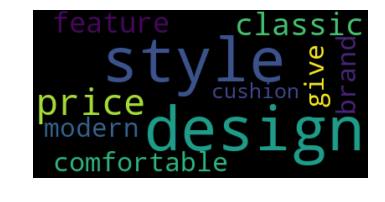

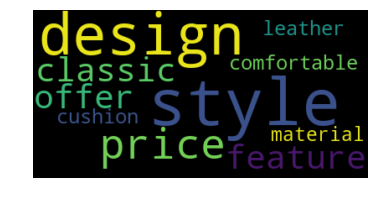

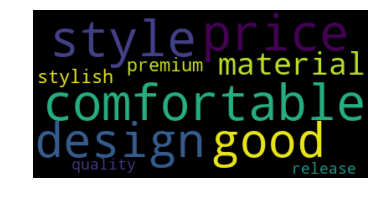

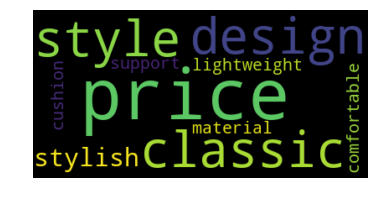

In [42]:
for i in range(4):
    wordcloud = WordCloud().generate(lda_b.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [43]:
lda_c = LdaMulticore(bow_corpus_c, id2word=dictionary_c, num_topics=4, random_state = 22, per_word_topics=True)

In [44]:
lda_c.print_topics()

[(0,
  '0.017*"narrow" + 0.013*"material" + 0.011*"color" + 0.009*"support" + 0.008*"toe" + 0.007*"notice" + 0.007*"fit" + 0.007*"wide" + 0.007*"run" + 0.007*"available"'),
 (1,
  '0.017*"narrow" + 0.012*"price" + 0.012*"break" + 0.010*"run" + 0.010*"expensive" + 0.009*"tad" + 0.008*"need" + 0.008*"small" + 0.007*"stiff" + 0.007*"size"'),
 (2,
  '0.014*"slightly" + 0.013*"narrow" + 0.012*"price" + 0.012*"material" + 0.011*"hard" + 0.010*"expensive" + 0.010*"small" + 0.010*"tight" + 0.009*"easily" + 0.009*"run"'),
 (3,
  '0.012*"narrow" + 0.012*"easily" + 0.009*"sole" + 0.009*"compare" + 0.009*"support" + 0.008*"time" + 0.007*"dirty" + 0.007*"little" + 0.007*"design" + 0.006*"material"')]

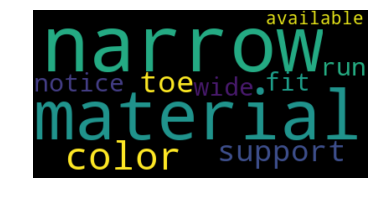

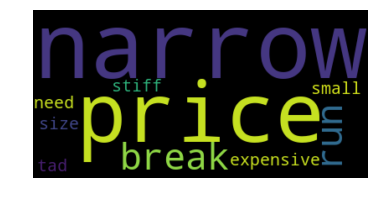

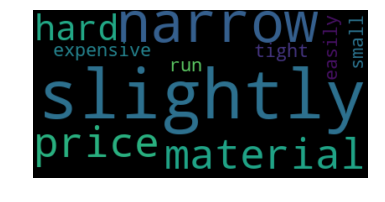

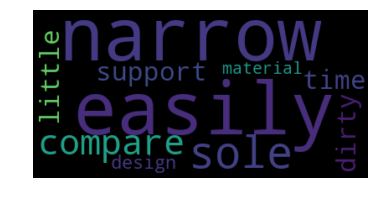

In [45]:
for i in range(4):
    wordcloud = WordCloud().generate(lda_c.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [46]:
lda_p = LdaMulticore(bow_corpus_p, id2word=dictionary_p, num_topics=4, random_state = 22, per_word_topics=True)

In [47]:
lda_p.print_topics()

[(0,
  '0.014*"comfortable" + 0.011*"good" + 0.010*"design" + 0.009*"quality" + 0.008*"excellent" + 0.008*"colorways" + 0.007*"price" + 0.007*"share" + 0.007*"stylish" + 0.006*"tester"'),
 (1,
  '0.012*"comfortable" + 0.008*"lightweight" + 0.008*"quality" + 0.007*"stylish" + 0.007*"style" + 0.007*"price" + 0.006*"good" + 0.006*"review" + 0.006*"material" + 0.006*"available"'),
 (2,
  '0.015*"comfortable" + 0.011*"good" + 0.011*"design" + 0.010*"material" + 0.008*"quality" + 0.008*"price" + 0.008*"stylish" + 0.007*"great" + 0.007*"highly" + 0.007*"recommend"'),
 (3,
  '0.012*"material" + 0.012*"comfortable" + 0.012*"design" + 0.010*"price" + 0.010*"good" + 0.009*"quality" + 0.007*"love" + 0.007*"cushion" + 0.006*"customer" + 0.006*"leather"')]

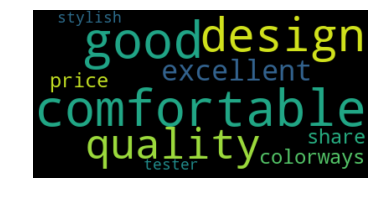

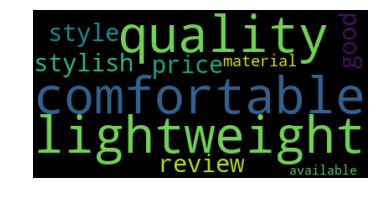

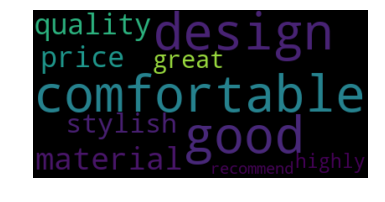

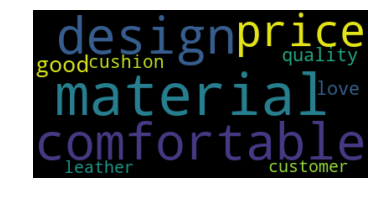

In [48]:
for i in range(4):
    wordcloud = WordCloud().generate(lda_p.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Vectorization

In [49]:
# List the top n words in a vocabulary according to occurrence in corpus

def get_top_n_words(corpus, ngram_start, ngram_end, n):
    cv = CountVectorizer(ngram_range = (ngram_start, ngram_end), min_df=25)
    bag_of_words = cv.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [50]:
def get_bottom_n_words(corpus, ngram_start, ngram_end, n):
    cv = CountVectorizer(ngram_range = (ngram_start, ngram_end), min_df=25)
    bag_of_words = cv.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1])
    return words_freq[:n]

In [51]:
# Given corpus, number of top words, the range of ngrams (just words: start = 1, end=1; words & bigrams: start=1, end=2), this function will graph the top words/ngrams in your corpus

def graph_top_n_ngrams(corpus, ngram_start, ngram_end, n):
    # Get top n words
    
    top_words = get_top_n_words(corpus, ngram_start, ngram_end, n)
    
    # Plot top n words
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.barh([x[0] for x in top_words], [y[1] for y in top_words], 
            align='center', alpha=0.5)
    plt.title('Word Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Word')

In [52]:
cv = CountVectorizer(min_df=25)

## Bottom line

In [53]:
cv_bottom_line = [' '.join(sublist) for sublist in list_bottom_line]

In [54]:
bag_of_words_b = cv.fit_transform(cv_bottom_line)

In [55]:
df_b = pd.DataFrame(bag_of_words_b.toarray(), columns=cv.get_feature_names())

In [56]:
df_b

,activity,add,addition,adv,aesthetic,affordability,affordable,almost,although,among,...,way,weather,white,winter,without,worth,would,year,yet,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
get_top_n_words(cv_bottom_line, 1, 1, 10)

[('style', 357),
 ('price', 344),
 ('design', 315),
 ('classic', 234),
 ('comfortable', 233),
 ('feature', 210),
 ('cushion', 182),
 ('material', 181),
 ('stylish', 180),
 ('lightweight', 177)]

In [58]:
get_bottom_n_words(cv_bottom_line, 1, 1, 100)

[('aside', 25),
 ('comfy', 25),
 ('affordability', 25),
 ('apart', 25),
 ('variation', 25),
 ('flexibility', 25),
 ('try', 25),
 ('label', 26),
 ('way', 26),
 ('get', 26),
 ('sport', 26),
 ('function', 26),
 ('positive', 26),
 ('never', 27),
 ('piece', 27),
 ('last', 27),
 ('pair', 27),
 ('minimal', 27),
 ('showcase', 27),
 ('around', 27),
 ('activity', 27),
 ('revamp', 27),
 ('insole', 27),
 ('maintain', 28),
 ('name', 28),
 ('anyone', 28),
 ('turn', 28),
 ('must', 28),
 ('collaboration', 28),
 ('ideal', 28),
 ('since', 29),
 ('trendy', 29),
 ('review', 29),
 ('best', 29),
 ('trainer', 29),
 ('enthusiast', 29),
 ('nike', 29),
 ('vibe', 30),
 ('side', 30),
 ('supportive', 30),
 ('lightness', 30),
 ('model', 30),
 ('traction', 30),
 ('slightly', 31),
 ('heritage', 31),
 ('introduce', 31),
 ('moreover', 31),
 ('minor', 31),
 ('tech', 31),
 ('contemporary', 31),
 ('launch', 32),
 ('school', 32),
 ('available', 32),
 ('series', 32),
 ('though', 33),
 ('might', 33),
 ('tongue', 33),
 ('slip

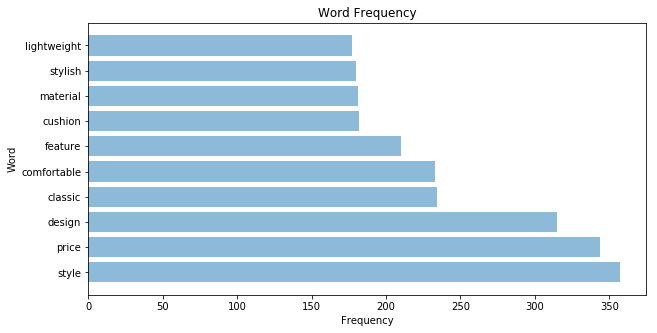

In [59]:
graph_top_n_ngrams(cv_bottom_line, 1, 1, 10)

## Con text

In [60]:
cv_con_text = [' '.join(sublist) for sublist in list_con_text]

In [61]:
bag_of_words_c = cv.fit_transform(cv_con_text)

In [62]:
df_c = pd.DataFrame(bag_of_words_c.toarray(), columns=cv.get_feature_names())

In [63]:
df_c

,ankle,another,arch,area,available,back,better,big,boost,box,...,tongue,two,uncomfortable,usual,version,white,wide,width,wish,would
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
get_top_n_words(cv_con_text, 1, 1, 10)

[('narrow', 209),
 ('material', 126),
 ('run', 109),
 ('price', 106),
 ('support', 105),
 ('easily', 104),
 ('small', 94),
 ('toe', 93),
 ('hard', 92),
 ('break', 89)]

In [65]:
get_bottom_n_words(cv_con_text, 1, 1, 100)

[('especially', 25),
 ('different', 25),
 ('durability', 26),
 ('rubber', 27),
 ('option', 27),
 ('sock', 27),
 ('mid', 28),
 ('observe', 29),
 ('much', 29),
 ('fan', 29),
 ('person', 29),
 ('difficult', 29),
 ('back', 29),
 ('offer', 29),
 ('least', 30),
 ('width', 30),
 ('big', 31),
 ('wish', 31),
 ('day', 31),
 ('expect', 31),
 ('premium', 31),
 ('part', 32),
 ('version', 32),
 ('usual', 32),
 ('poor', 32),
 ('take', 32),
 ('midsole', 32),
 ('make', 32),
 ('quality', 33),
 ('white', 33),
 ('state', 33),
 ('cause', 33),
 ('ankle', 34),
 ('another', 34),
 ('original', 34),
 ('period', 34),
 ('enough', 35),
 ('boost', 35),
 ('uncomfortable', 35),
 ('side', 36),
 ('rub', 36),
 ('two', 36),
 ('commenters', 37),
 ('heavy', 38),
 ('review', 38),
 ('put', 38),
 ('critic', 38),
 ('grip', 38),
 ('suede', 39),
 ('clean', 40),
 ('colorway', 40),
 ('design', 41),
 ('thin', 41),
 ('outsole', 42),
 ('tend', 42),
 ('shoe', 42),
 ('box', 42),
 ('better', 43),
 ('online', 43),
 ('first', 44),
 ('coul

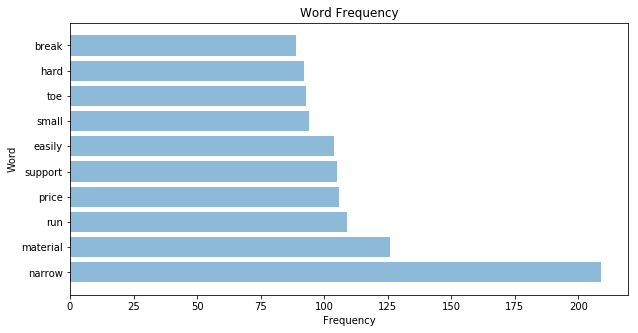

In [66]:
graph_top_n_ngrams(cv_con_text, 1, 1, 10)

## Pro text

In [67]:
cv_pro_text = [' '.join(sublist) for sublist in list_pro_text]

In [68]:
bag_of_words_p = cv.fit_transform(cv_pro_text)

In [69]:
df_p = pd.DataFrame(bag_of_words_p.toarray(), columns=cv.get_feature_names())

In [70]:
df_p

,accent,activity,actual,add,addition,adequate,admire,adore,adv,aesthetic,...,wide,winter,without,word,work,worth,would,year,yet,zoom
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
get_top_n_words(cv_pro_text, 1, 1, 10)

[('comfortable', 619),
 ('design', 452),
 ('good', 444),
 ('material', 400),
 ('quality', 396),
 ('price', 379),
 ('stylish', 314),
 ('colorways', 285),
 ('lightweight', 276),
 ('style', 275)]

In [72]:
get_bottom_n_words(cv_pro_text, 1, 1, 100)

[('solid', 25),
 ('accent', 25),
 ('photo', 26),
 ('touch', 26),
 ('surprise', 26),
 ('period', 26),
 ('short', 26),
 ('suit', 26),
 ('improve', 26),
 ('vibrant', 26),
 ('superior', 26),
 ('like', 27),
 ('declare', 27),
 ('generally', 27),
 ('first', 27),
 ('finish', 27),
 ('sporty', 27),
 ('area', 27),
 ('protection', 27),
 ('anything', 27),
 ('fashion', 28),
 ('shoes', 28),
 ('chunky', 28),
 ('right', 28),
 ('say', 28),
 ('deem', 28),
 ('adequate', 28),
 ('nearly', 28),
 ('head', 28),
 ('activity', 29),
 ('logo', 29),
 ('addition', 29),
 ('try', 29),
 ('hour', 29),
 ('pattern', 30),
 ('snug', 30),
 ('reasonably', 30),
 ('craftsmanship', 30),
 ('month', 30),
 ('level', 31),
 ('incredibly', 31),
 ('amaze', 31),
 ('vibe', 31),
 ('gym', 31),
 ('sell', 31),
 ('include', 31),
 ('impact', 31),
 ('stripe', 32),
 ('bring', 32),
 ('fashionable', 32),
 ('peer', 32),
 ('enhance', 32),
 ('per', 33),
 ('perfectly', 33),
 ('timeless', 33),
 ('help', 33),
 ('laud', 33),
 ('technology', 34),
 ('remai

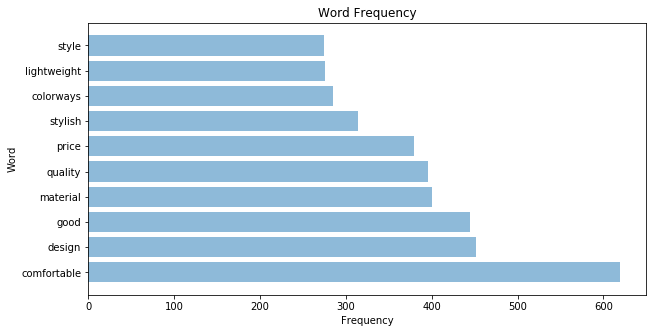

In [73]:
graph_top_n_ngrams(cv_pro_text, 1, 1, 10)

# NearestNeighbors

## Bottom line

In [74]:
X_b = np.array(df_b)

In [75]:
neighbor_b = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [76]:
neighbor_b.fit(X_b)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [77]:
b = neighbor_b.kneighbors(n_neighbors= 5, return_distance=False)

In [78]:
b

array([[310, 103, 805, 250, 455],
       [589,   4,  80, 246, 301],
       [406, 672, 631, 677, 235],
       ...,
       [ 75, 557, 717,  70, 647],
       [742, 513, 340, 637, 653],
       [711, 838,  37, 698, 759]])

## Con text

In [79]:
X_c = np.array(df_c)

In [80]:
neighbor_c = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [81]:
neighbor_c.fit(X_c)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [82]:
c = neighbor_c.kneighbors(n_neighbors= 5, return_distance=False)

In [83]:
c

array([[316,  52, 474, 557,  82],
       [699, 590, 623, 455, 271],
       [285, 672, 363, 297, 102],
       ...,
       [160, 398, 697, 350, 399],
       [219, 252, 468, 753, 157],
       [206, 773, 744, 378, 776]])

## Pro text

In [84]:
X_p = np.array(df_p)

In [85]:
neighbor_p = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [86]:
neighbor_p.fit(X_p)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [87]:
p = neighbor_p.kneighbors(n_neighbors= 5, return_distance=False)

In [88]:
p

array([[306, 234, 269, 624, 393],
       [ 58, 617, 805, 742, 632],
       [672, 297,  24, 733, 221],
       ...,
       [840, 329, 611,  79, 669],
       [605, 167, 326, 511, 364],
       [253, 803, 459, 205, 249]])

In [89]:
def get_neighbors(sneaker):
    sneaker = difflib.get_close_matches(sneaker, df_name_score.name.tolist())[0]
    print(sneaker)
    i = df_name_score[df_name_score['name'] == f'{sneaker}'].index[0]
    b1 = b[i][0]
    n_b1 = df_name_score.iloc[b1]['name']
#     r = 0
    c1 = c[i][0]
#     while c1 == b1:
#         r += 1
#         c1 = c[i][r]
    n_c1 = df_name_score.iloc[c1]['name']
    p1 = p[i][0]
#     while p1 == c1:
#         r += 1
#         p1 = p[i][r]
    n_p1 = df_name_score.iloc[p1]['name']
    chrome_path = 'open -a /Applications/Google\ Chrome.app %s'
    shoes = [sneaker, n_b1, n_c1, n_p1]
    print(shoes)
    for s in shoes:
        s = s.lower()
        s = s.replace(' ', '-')
        s = s.replace('_', '-')
        s = s.replace('.', '')
        s = s.replace('/', '')
        url = f'https://runrepeat.com/{s}'
        webbrowser.get(chrome_path).open(url, new=2)
        time.sleep(5)

In [90]:
adidas = df_name_score[:472]

In [91]:
nike = df_name_score[472:]

In [92]:
adidas

,name,score
0,Pharrell Williams x Adidas Human Race NMD,93
1,Adidas Stan Smith,93
2,Adidas Continental 80,92
3,Adidas POD-S3.1,92
4,Adidas Superstar,94
5,Adidas Grand Court,92
6,Adidas I-5923,91
7,Adidas Sobakov,92
8,Adidas Swift Run,93
9,Adidas NMD_R1 Primeknit,92


In [93]:
nike

,name,score
472,Nike Air Max 270,93
473,Nike Tanjun,96
474,Nike Air Max 270 Bowfin,93
475,Nike Air Force 1 Low,96
476,Nike Air Max Motion 2,94
477,Nike Ebernon Low,92
478,Nike M2K Tekno,91
479,Nike Air Max Plus,88
480,Nike SB Nyjah Free,92
481,Nike EXP-X14,90


In [94]:
get_neighbors(input())

superstar
Adidas Superstar
['Adidas Superstar', 'Adidas CLMBA SPZL', 'Nike SB Air Max Stefan Janoski 2', 'Adidas Superstar White Mountaineering']
